In [5]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.rc('axes',unicode_minus=False)



# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "dim_reduction"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [20]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

print('X.shape:', X.shape)


# 출처: https://excelsior-cjh.tistory.com/167 [EXCELSIOR]

X.shape: (60, 3)


In [43]:
X_cen = X - X.mean(axis=0)  # 평균을 0으로 정규화
X_cov = np.dot(X_cen.T, X_cen) / 59 #공분산 행렬을 계산한다. 
print('X_cov :', X_cov)

w, v = np.linalg.eig(X_cov)

print('\neigenvalue = pca.explained_variance:', w)
print('\neigenvector = pca.components.T:\n', v)
print('\nexplained variance ratio :', w / w.sum())

X_cov : [[0.69812855 0.17640539 0.12137931]
 [0.17640539 0.1801727  0.07253614]
 [0.12137931 0.07253614 0.04552382]]

eigenvalue = pca.explained_variance: [0.77830975 0.1351726  0.01034272]

eigenvector = pca.components.T:
 [[ 0.93636116  0.34027485 -0.08626012]
 [ 0.29854881 -0.90119108 -0.31420255]
 [ 0.18465208 -0.2684542   0.94542898]]

explained variance ratio : [0.84248607 0.14631839 0.01119554]


In [37]:
U, D, V_t = np.linalg.svd(X_cen)
print('singular value :', D)
print('\nsingular vector :\n', V_t.T)
print('\nexplained variance ratio :', D ** 2 / np.sum(D**2))


singular value : [6.77645005 2.82403671 0.78116597]

singular vector :
 [[ 0.93636116 -0.34027485 -0.08626012]
 [ 0.29854881  0.90119108 -0.31420255]
 [ 0.18465208  0.2684542   0.94542898]]

explained variance ratio : [0.84248607 0.14631839 0.01119554]


In [39]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X)

print('singular value :', pca.singular_values_)
print('\nsingular vector=pca.components_.T :\n', pca.components_.T)

# PC1에 projection
pc1 = v[:, 0]
proj1 = np.dot(X, pc1)
 
# ​# PC2에 projection 
pc2 = v[:, 1]
proj2 = np.dot(X, pc2)

# ​# PC3에 projection
pc3 = v[:, 2]
proj3 = np.dot(X, pc3)
proj_list = np.array([proj1.var(), proj2.var(), proj3.var()])

print('\nvariance(==eigenvalue) :', proj_list)
print('\nexplained variance ratio :', proj_list / proj_list.sum())

singular value : [6.77645005 2.82403671 0.78116597]

singular vector=pca.components_.T :
 [[-0.93636116  0.34027485 -0.08626012]
 [-0.29854881 -0.90119108 -0.31420255]
 [-0.18465208 -0.2684542   0.94542898]]

variance(==eigenvalue) : [0.76533792 0.13291972 0.01017034]

explained variance ratio : [0.84248607 0.14631839 0.01119554]


In [31]:
pca.explained_variance_

array([0.77830975, 0.1351726 , 0.01034272])

In [35]:
pca.components_

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ],
       [-0.08626012, -0.31420255,  0.94542898]])

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)
X2D.shape

(60, 2)

0.7625315008826112 [-0.94446029 -0.32862557]
[ 0.03351168 -0.00408072] [-2.4406829  -0.86497833]
0.018477895513562572 [-0.32862557  0.94446029]
[ 0.03351168 -0.00408072] [-0.10050192  0.38107044]


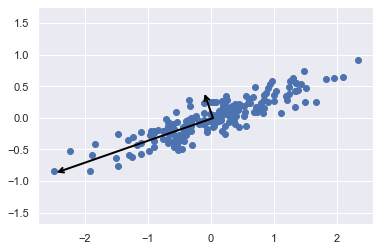

In [18]:
#https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T


from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0,
                    color='black')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data

plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

variance=pca.explained_variance_
components=pca.components_

for length, vector in zip(variance,components): #variance=length=1*2, components=vector=2*2
    print(length, vector)
    v = 3* vector * np.sqrt(length) 
    print(pca.mean_, pca.mean_ + v)#중간점->중간+vector를 연결
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [11]:
pca.explained_variance_

array([0.7625315, 0.0184779])

In [12]:
pca.components_

array([[-0.94446029, -0.32862557],
       [-0.32862557,  0.94446029]])

In [7]:
np.random.randn(m, 2) 

array([[ 0.08905337,  0.7788969 ],
       [ 1.26464491, -0.88051133],
       [ 0.2364056 ,  0.81560447],
       [ 1.86081167,  0.25559049],
       [-0.54150372, -0.68959966],
       [-0.35744073, -0.6519202 ],
       [ 0.82653585,  1.06930572],
       [ 0.72485682,  1.19218624],
       [-0.45376854,  0.38033506],
       [-0.38466318,  0.04365869],
       [ 1.22498574, -0.02973531],
       [-1.8648058 , -0.25281599],
       [-0.7128498 , -1.50891712],
       [-0.79036569,  0.9606248 ],
       [ 1.68091065, -0.48900604],
       [ 1.00253584,  1.1782221 ],
       [-1.15979227, -0.0393627 ],
       [-0.04446017,  0.17238568],
       [-1.59375081, -0.34914224],
       [ 1.05782121,  1.2622032 ],
       [ 1.83136208, -0.33750905],
       [ 1.86950756,  0.66590511],
       [-1.35920117,  0.76160928],
       [-0.35228003,  0.51907626],
       [-0.10252394,  1.20823864],
       [ 0.25656016, -0.28250502],
       [ 0.96496577,  0.25622178],
       [-0.4129564 ,  1.27727436],
       [-0.40834524,

그림 저장 pca_best_projection_plot


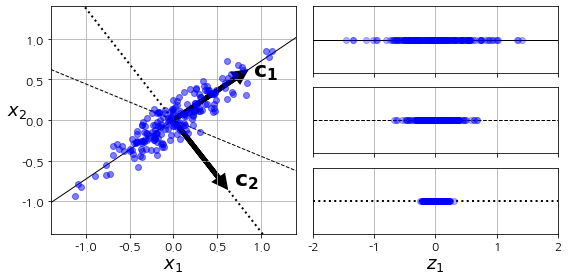

In [6]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)